# Bartsz Konopka - Laboratorium nr 3 - grupa 2

# Wstęp

Na zajęciach zajęliśmy problem aproksymacji funkcji i pojęciem regresji. Przy pomocy klasy MLPRegressor tworzyliśmy architektury sieci neuronowych dokonujących aproksymacji funkcji, po czym wykonywaliśmy ewaluację otrzymanych danych przy pomocy MSE. Porównywaliśmy również jak wykorzystana architektura, liczba epok, czy podział na zbiór testujący i treningowy wpływa na otrzymany wynik.

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

# ZAD 1

## Kod

Treść:

Plik advertising.csv zawiera w każdym rzędzie informację na temat wydatków na reklamę telewizyjną, reklamową i prasową dla pojedynczego produktu oraz zyski z jego sprzedaży. Można przedstawić zyski jako funkcję  Z(wTV,wradio,wprasa) . Proszę zaproponować architrekturę sieci neuronowej, która dokona aproksymacji tej funkcji i dokonać ewaluacji tej sieci. Proszę porównać wyniki (MSE) dla przynajmniej dwóch różnych struktur jeżeli chodzi o liczbę neuronów i dla dwóch różnych funkcji aktywacji (najlepiej relu i tanh). Proszę pamiętać o podzieleniu zbioru na dane uczące i testujące.

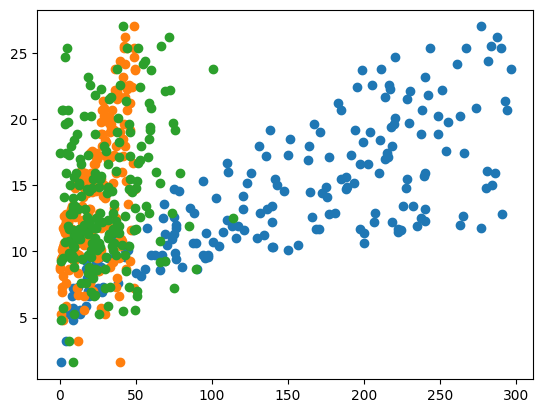

In [3]:
data_ad = pd.read_csv('Advertising.csv', sep = ',', header = None)
data_ad = data_ad.drop(0)
data_ad = data_ad.iloc[:,1:]

X = data_ad.iloc[:,0:3]
X = X.to_numpy().astype(float)
y = data_ad.iloc[:,3]
y = y.to_numpy().astype(float)

plt.plot(X[:,0],y, "o")
plt.plot(X[:,1],y, "o")
plt.plot(X[:,2],y, "o")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

structures = [(20,20), (100,100,100,100,100)]
activation_functions = ['relu', 'tanh']

for structure in structures:
  for activation_function in activation_functions:
    network = MLPRegressor(solver='adam',hidden_layer_sizes = structure, max_iter = 2000, tol = 0.001, activation = activation_function)
    network.fit(X_train, y_train)
    predicted = network.predict(X_test)
    MSE_network = mean_squared_error(y_test, predicted)
    score_network = network.score(X_test,y_test)
    print(f"Activation: {activation_function}, Structure: {structure} -- MSE: {MSE_network}, Score: {score_network}")


Activation: relu, Structure: (20, 20) -- MSE: 2.402929274153063, Score: 0.8975468987319857
Activation: tanh, Structure: (20, 20) -- MSE: 0.6149795977987746, Score: 0.9737792669602197
Activation: relu, Structure: (100, 100, 100, 100, 100) -- MSE: 3.6960912879658268, Score: 0.8424106697209153
Activation: tanh, Structure: (100, 100, 100, 100, 100) -- MSE: 0.561583551131242, Score: 0.97605590099826


## Wnioski

Funkcja aktywacji tanh osiągnęła niższy błąd średniokwadratowy (MSE) i wyższy wynik (score) w porównaniu z funkcją relu dla obu struktur sieci (20,20) i (100,100,100,100,100). To sugeruje, że tanh lepiej aproksymuje funkcję zysku. Dla funkcji relu, obserwowano wyższe wartości MSE (odpowiednio 2.40 i 3.70), co wskazuje na większy błąd w aproksymacji. Struktura sieci (100,100,100,100,100) osiągnęła niższy MSE i wyższy wynik niż struktura (20,20), co sugeruje, że większa liczba neuronów w warstwach ukrytych poprawia zdolność sieci do modelowania danych.

# ZAD 2

## Kod

Treść:

Proszę zaproponować jak najmniejszą sieć (najlepiej z jedną warstwą ukrytą) do aproksymacji funkcji  f(x)=sin(x)  w przedziale  [−2π,2π] . Proszę użyć  tanh  jako funkcji aktywacji. Proszę narysować funkcję aproksymowaną i aproksymującą. Wykorzystując dostęp do wag i biasów (network.coefs_ i network.intercepts_) proszę zapisać wzór funkcji aproksymującej.

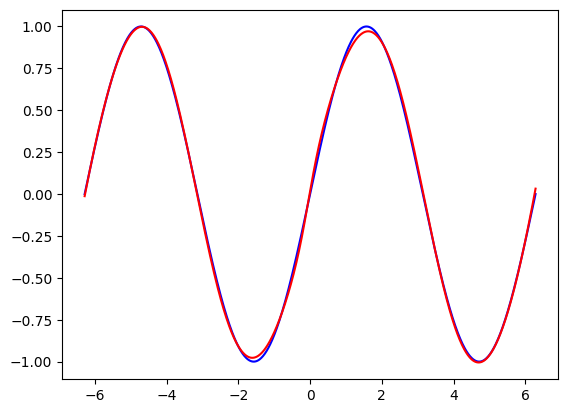

Wzór funkcji aproksymującej:
f(x) = tanh(0.48178779470568545 * x + -1.539879828392632)


In [6]:
X_train = np.linspace(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
y_train = np.sin(X_train).ravel()

network = MLPRegressor(solver = "lbfgs", hidden_layer_sizes=(4,1), max_iter = 2000, tol = 0.001, activation='tanh')
network.fit(X_train, y_train)

X_test = np.linspace(-2*np.pi, 2*np.pi, 1000).reshape(-1, 1)
y_test = np.sin(X_test).ravel()
y_test_approx = network.predict(X_test)

plt.plot(X_test, y_test, color='blue')
plt.plot(X_test, y_test_approx, color='red')
plt.show()

print("Wzór funkcji aproksymującej:")
print(f"f(x) = tanh({network.coefs_[0][0][0]} * x + {network.intercepts_[0][0]})")

## Wnioski


W przypadku funkcji sinus w przedziale [−2π,2π], użyto minimalnej konfiguracji sieci z jedną warstwą ukrytą zawierającą 4 neurony i funkcją aktywacji tanh. Ta liczba neuronów (potęga liczby 2) okazała się być minimalną liczbą umożliwiającą poprawną aproksymację funkcji. Wzór funkcji aproksymującej, oparty na wagach i biasach sieci, jest postaci f(x)=tanh(w∗x+b), gdzie w to waga neuronu, a b to bias. Wykorzystanie funkcji aktywacji tanh okazało się efektywne w aproksymacji funkcji sinus w tym przypadku.

# ZAD 3

## Kod

Treść:

Proszę pobrać zbiór california housing (można go załadować w sklearnie dzięki funkcji fetch_california_housing( ), jest też dostępny w colabie jako przykładowy plik testowy w colabie). Zawiera nieznormalizowane dane dotyczące bloków mieszkalnych w Kaliforni zebranych w 1990 roku, takie jak lokacja geograficzna, wiek, całkowita liczba mieszkańców bloku, znajdujące się w nim mieszkania i sypialnie, oraz mediana dochodów tych mieszkańców. W ostatniej kolumnie znajduje się mediana wartości mieszkania w tym bloku. Proszę znormalizować dane, a następnie zaproponować kilka wielowarstowych sieci neuronowych i ocenić jak dobrze dokonają aproksymacji funkcji mediany wartości mieszkań za pomocą opisanych dzisiaj metryk. Proszę spróbować osiągnąć jak najlepszy wynik (jak najniższe MSE). Wyniki oczywiście proszę sprawdzać na danych testujących.



In [7]:
data_housing = fetch_california_housing()
X = data_housing.data
y = data_housing.target

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
models = [MLPRegressor(solver='adam', hidden_layer_sizes=(50, 50), max_iter=1000, tol = 0.001, activation='relu'), MLPRegressor(solver='adam', hidden_layer_sizes=(100, 100), max_iter=1000, tol = 0.001, activation='relu'), MLPRegressor(solver='adam', hidden_layer_sizes=(50, 50, 50), max_iter=1000, tol = 0.001, activation='relu')]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"MSE for model {model}: {mse}")

MSE for model MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=1000, tol=0.001): 0.27524381657865366
MSE for model MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, tol=0.001): 0.2705224136632715
MSE for model MLPRegressor(hidden_layer_sizes=(50, 50, 50), max_iter=1000, tol=0.001): 0.2814722236483337


## Wnioski

Znormalizowano dane korzystając ze standardowej normalizacji za pomocą StandardScaler(). Przetestowano trzy różne architektury sieci neuronowych z funkcją aktywacji relu: (50, 50), (100, 100) i (50, 50, 50). Najlepsze wyniki MSE uzyskano dla architektur (100, 100) (MSE: 0.2705) i (50, 50) (MSE: 0.2752). Trzywarstwowa architektura (50, 50, 50) osiągnęła nieco gorszy wynik MSE (0.2815). Różnice między wynikami MSE są niewielkie, co sugeruje, że wybór architektury może zależeć od konkretnego przypadku.

# ZAD 4

## Kod

Treść:

Proszę, bazując na powyższym zbiorze danych, dla wybranych struktur sieci (np. najlepszej otrzymanej sieci), wykonać wykresy zależności ilości wykonanych przez sieć epok oraz uzyskanych metryk. Uzyskany wynik należy odpowiednio opisać oraz odnieść do dotychczasowych zagadnień poruszanych na zajęciach.

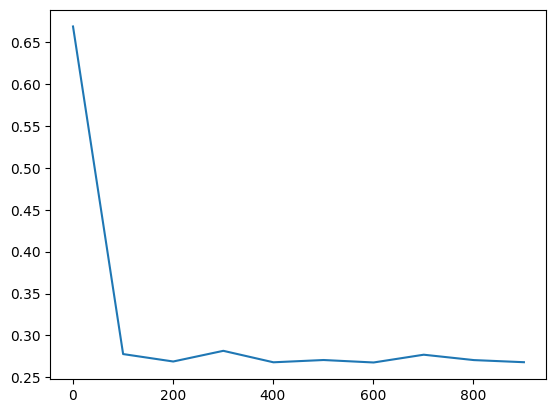

In [9]:
epochs = range(1, 1001, 100)

history = []

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for epoch in epochs:
      model = MLPRegressor(solver='adam', hidden_layer_sizes=(100, 100), max_iter=epoch, tol = 0.001, activation='relu')
      model.fit(X_train, y_train)
      pred = model.predict(X_test)
      mse = mean_squared_error(y_test, pred)
      history.append(mse)

plt.plot(epochs, history)
plt.show()

## Wnioski

Wykres przedstawia związek między liczbą epok a wartością błędu średniokwadratowego (MSE). Początkowo, wraz z wzrostem liczby epok, wartość MSE maleje, co wskazuje na poprawę osiągów sieci w trakcie uczenia się. Jednak po pewnym czasie, efektywność sieci w redukcji błędu może przestać rosnąć lub nawet maleć, co może być spowodowane przeuczeniem się modelu lub osiągnięciem punktu, w którym dalsze uczenie nie przynosi istotnej poprawy. Analiza krzywej uczenia może pomóc w zrozumieniu tempa dostosowywania się modelu do danych treningowych oraz w identyfikacji optymalnej liczby epok. Istotne jest monitorowanie krzywej uczenia, aby zapobiec przeuczeniu lub przedwczesnemu zatrzymaniu uczenia się, co może ograniczyć zdolność modelu do osiągnięcia najlepszych wyników.

# ZAD 5

## Kod

Treść:

Proszę sprawdzić wyniki regresji dla zbioru california housing dla różnych podziałów na dane uczące i testujące (dla co najmniej pięciu podziałów 20-80, 35-65, 50-50, 65-35, 80-20) i wyciągnąć wnioski.

In [10]:
split_ratios = [(0.2, 0.8), (0.35, 0.65), (0.5, 0.5), (0.65, 0.35), (0.8, 0.2)]

results = []

for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio[1], random_state=42)
    model = MLPRegressor(solver='adam', hidden_layer_sizes=(100, 100), max_iter=1000, tol = 0.001, activation='relu')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    results.append((split_ratio, mse))

for result in results:
    print(f"Podział danych: {result[0]}, MSE: {result[1]}")

Podział danych: (0.2, 0.8), MSE: 0.3072946143653813
Podział danych: (0.35, 0.65), MSE: 0.30090342355427147
Podział danych: (0.5, 0.5), MSE: 0.2892675637799287
Podział danych: (0.65, 0.35), MSE: 0.28599719756791425
Podział danych: (0.8, 0.2), MSE: 0.26794494212075975


## Wnioski

Malejąc udziałem danych testowych (zwiększając udział danych uczących), obserwujemy spadek wartości MSE. To wskazuje, że model jest lepiej dopasowany do danych treningowych, jednakże może mieć ograniczoną zdolność generalizacji na nowych danych. Najlepsze wyniki MSE uzyskano dla proporcji podziału danych 80-20 i 65-35, co sugeruje, że modele w tych proporcjach radzą sobie najlepiej z przewidywaniem wartości mediany cen mieszkań. Średnia wartość MSE dla wszystkich proporcji podziału danych wynosi około 0.29, co oznacza, że model nie perfekcyjnie przewiduje medianę cen mieszkań, ale osiąga zadowalające wyniki błędu.